In [40]:
%load_ext autoreload
#To update the imported files

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
%autoreload
import sys
import warnings
warnings.filterwarnings("ignore")

sys.path.insert(0, '../')
from constants import *
from utilities_RF import *
from utilities import *

In [42]:
hyperparameters = {'max_depth': None, 'n_estimators': 100, 'n_jobs' : -1}

# Dataset A

In [43]:
selected_features_a = selected_features.copy()
selected_features_a.remove("direct_rad:W")
hyperparameters_a = {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
wanted_months_a = wanted_months

In [44]:
X_train_a_prep = prepare_X(X_observed_a, X_estimated_a, selected_features_a, wanted_months_a)
X_train_a, y_train_a = resize_training_data(X_train_a_prep, y_a)
X_test_a_prep = prepare_testdata_rf_a(X_test_a, selected_features_a)

In [45]:
X_train_a.shape

(17572, 48)

In [15]:
rf_a = Random_Forest(hyperparameters_a, X_train_a, X_test_a_prep, y_train_a)

In [16]:
rf_a_cross_val_predictions,rf_a_cross_val_actuals, rf_a_cross_val_mae_mean = rf_a.cross_val_stack(X_train_a, y_train_a)

In [ ]:
rf_a.cross_validate(X_train_a, y_train_a)

Cross-validation scores: [340.20336077 315.37781209 314.42380145 267.25179038 160.02939087]
Mean cross-validation score: 279.45723111219047


array([  49.16622762,  240.21638282,  594.34677529, ..., 1666.88302735,
       1833.56791338,    0.        ])

In [ ]:
rf_a.fit()
rf_a.pred()
rf_a_test_pred = rf_a.prediction
#rf_a.feature_importence_plot()

In [10]:
#rf_a.corr_plot()

# Dataset B

In [55]:
selected_features_b = selected_features
hyperparameters_b = {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
wanted_months_b = wanted_months

In [56]:
X_train_b_prep = prepare_X(X_observed_b, X_estimated_b, selected_features_b, wanted_months_b)
X_train_b, y_train_b = resize_training_data(X_train_b_prep, y_b)
X_test_b_prep = prepare_testdata_rf_a(X_test_b, selected_features_b)

In [57]:
X_train_b, y_train_b = add_a_to_the_other_datasets(X_train_a.copy(), y_train_a.copy(), X_train_b.copy(), y_train_b.copy())

In [60]:
X_train_b.shape

(26840, 49)

In [61]:
rf_b = Random_Forest(hyperparameters_b, X_train_b, X_test_b_prep, y_train_b)

In [14]:
rf_b_cross_val_predictions,rf_b_cross_val_actuals, rf_b_cross_val_mae_mean = rf_b.cross_val_stack(X_train_b, y_train_b)

In [15]:
#rf_b.cross_validate(X_train_b, y_train_b)

In [16]:
rf_b.fit()
rf_b.pred()
rf_b_test_pred = rf_b.prediction
#rf_b.feature_importence_plot()

# Dataset C

In [17]:
selected_features_c = selected_features
hyperparameters_c = {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
wanted_months_c = wanted_months

In [18]:
X_train_c_prep = prepare_X(X_observed_c, X_estimated_c, selected_features_c, wanted_months_c)
X_train_c, y_train_c = resize_training_data(X_train_c_prep, y_c)
X_test_c_prep = prepare_testdata_rf_a(X_test_c, selected_features_c)

In [19]:
rf_c = Random_Forest(hyperparameters_c, X_train_c, X_test_c_prep, y_train_c)

In [20]:
rf_c_cross_val_predictions,rf_c_cross_val_actuals, rf_c_cross_val_mae_mean = rf_c.cross_val_stack(X_train_c, y_train_c)

In [21]:
#rf_c.cross_validate(X_train_c, y_train_c)

In [22]:
rf_c.fit()
rf_c.pred()
rf_c_test_pred = rf_c.prediction

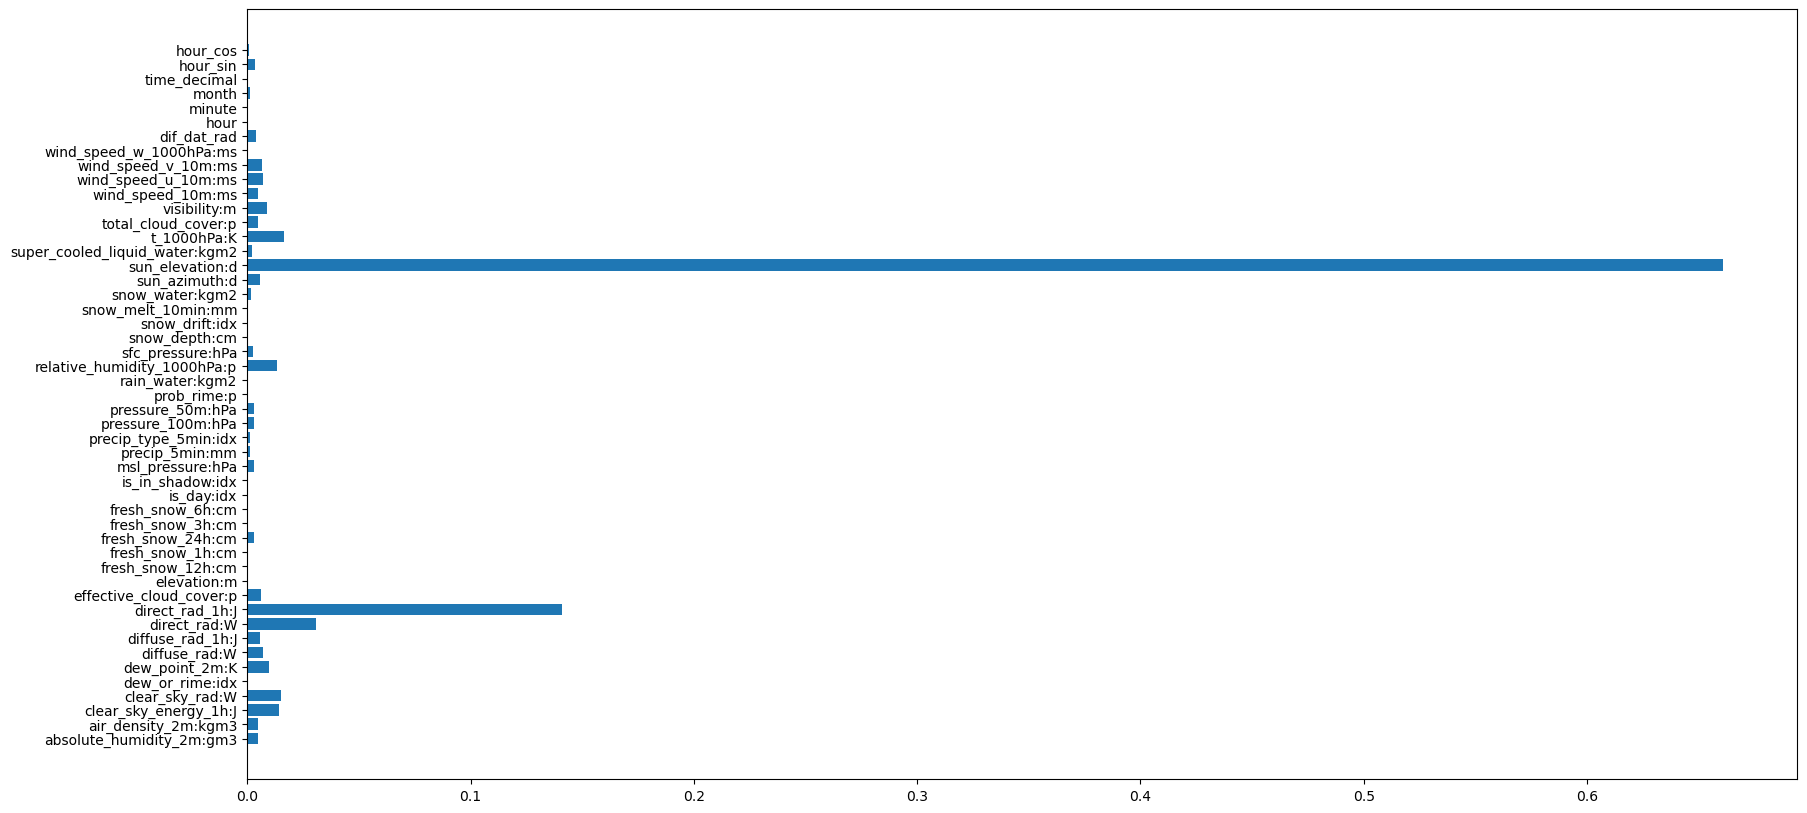

In [66]:
rf_c.feature_importence_plot()


,date_forecast
0,2023-05-01 00:00:00
1,2023-05-01 00:15:00
2,2023-05-01 00:30:00
3,2023-05-01 00:45:00
4,2023-05-01 01:00:00
...,...
2875,2023-07-03 22:45:00
2876,2023-07-03 23:00:00
2877,2023-07-03 23:15:00
2878,2023-07-03 23:30:00


In [69]:
X_test_a_copy = mean_df(X_test_a.copy())
pred_a = pd.DataFrame()
pred_a['date_forecast'] = X_test_a_copy['date_forecast'].copy()
pred_a['pv_measurement'] = rf_a_test_pred

In [99]:
pred_a.to_excel("pred_a.xlsx", index=False)

In [154]:
pred_a

,date_forecast,pv_measurement
0,2023-05-01 00:00:00,0.000000
1,2023-05-01 01:00:00,0.000000
2,2023-05-01 02:00:00,0.062799
3,2023-05-01 03:00:00,60.632435
4,2023-05-01 04:00:00,366.035878
...,...,...
715,2023-07-03 19:00:00,195.221020
716,2023-07-03 20:00:00,66.264280
717,2023-07-03 21:00:00,1.543169
718,2023-07-03 22:00:00,0.002585


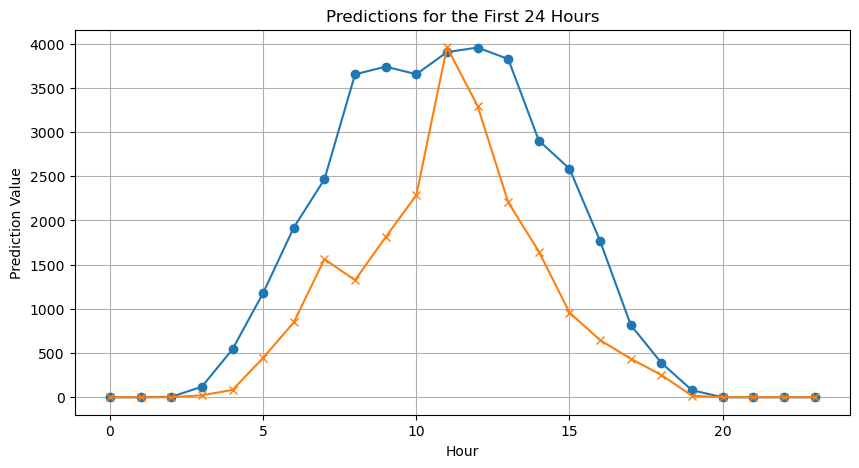

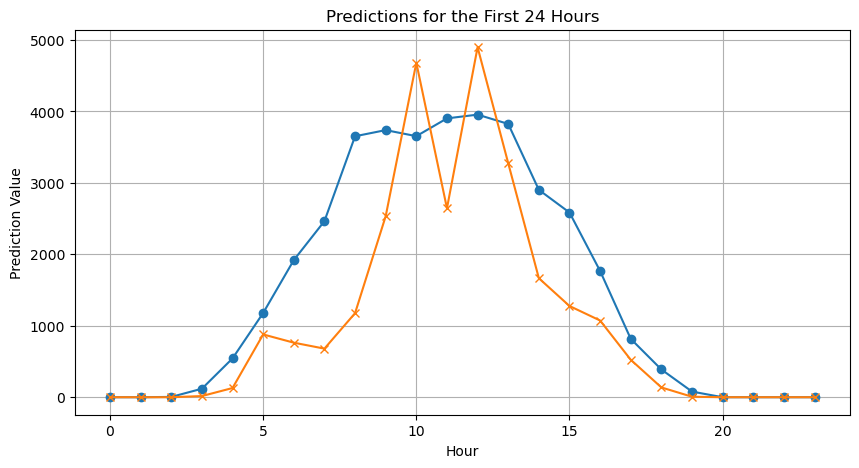

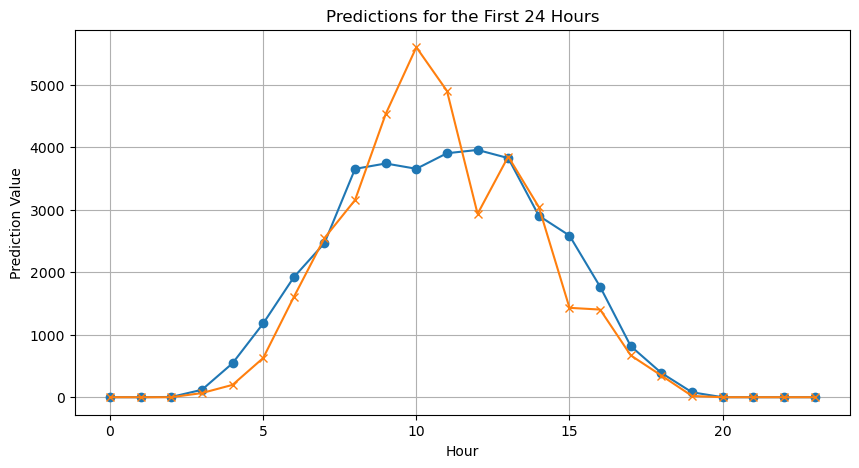

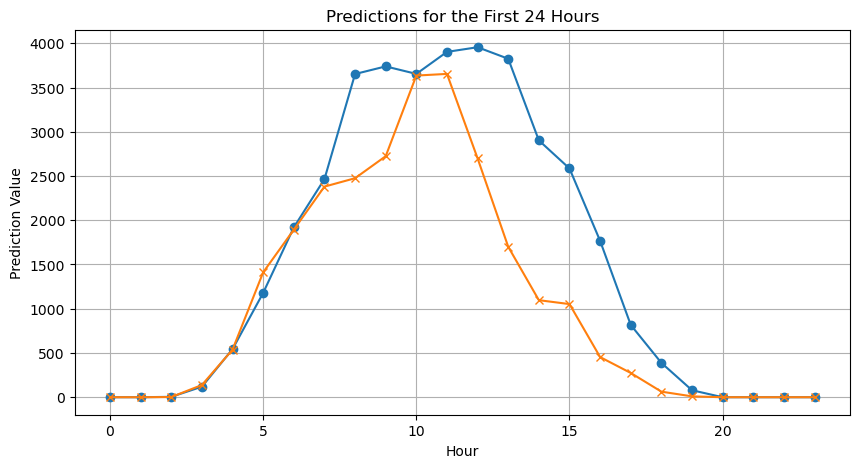

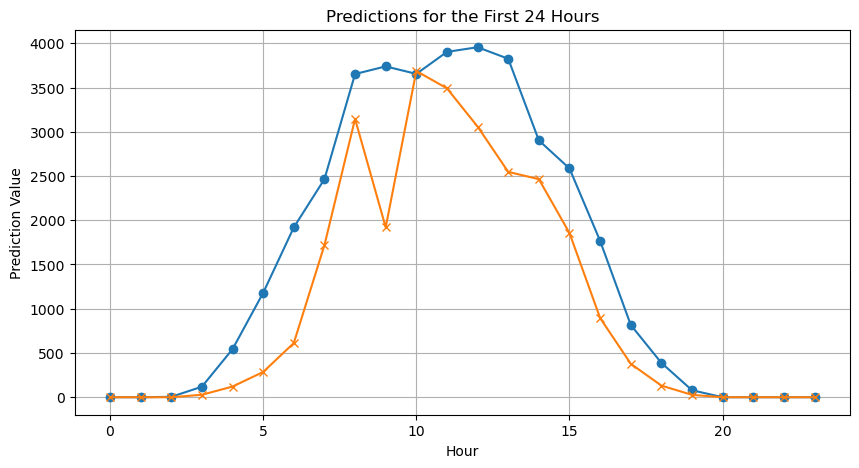

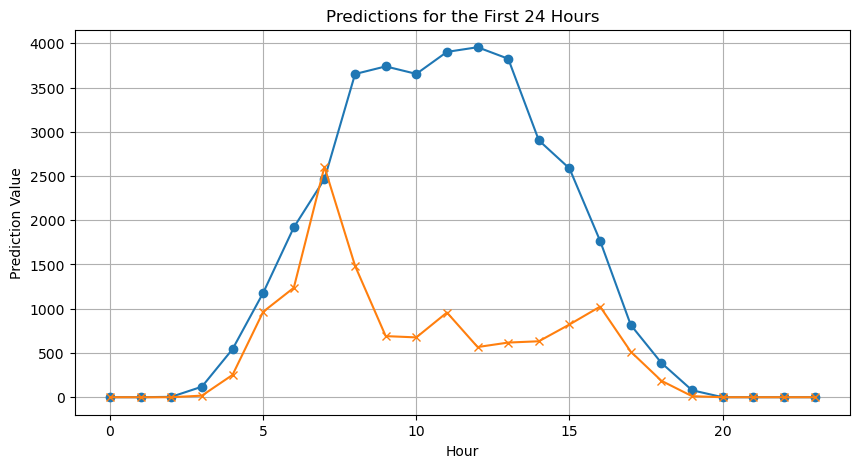

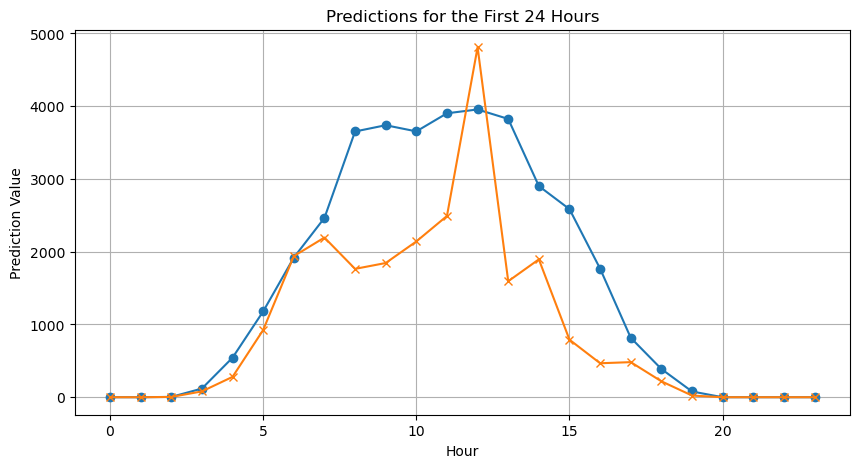

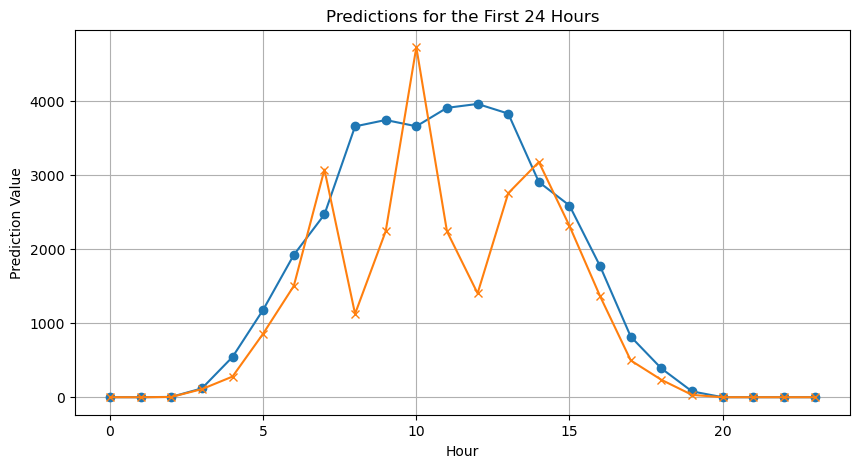

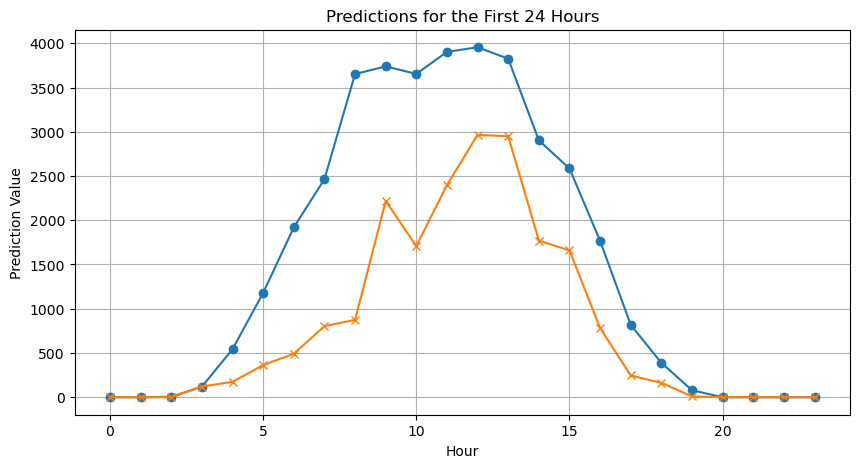

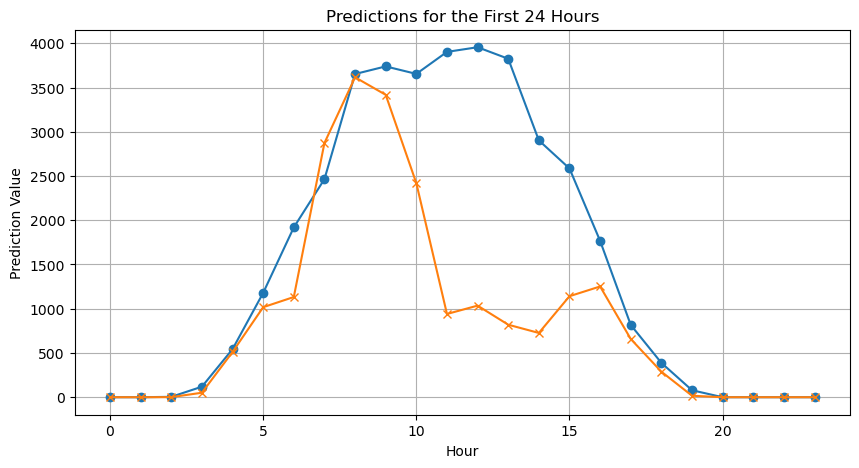

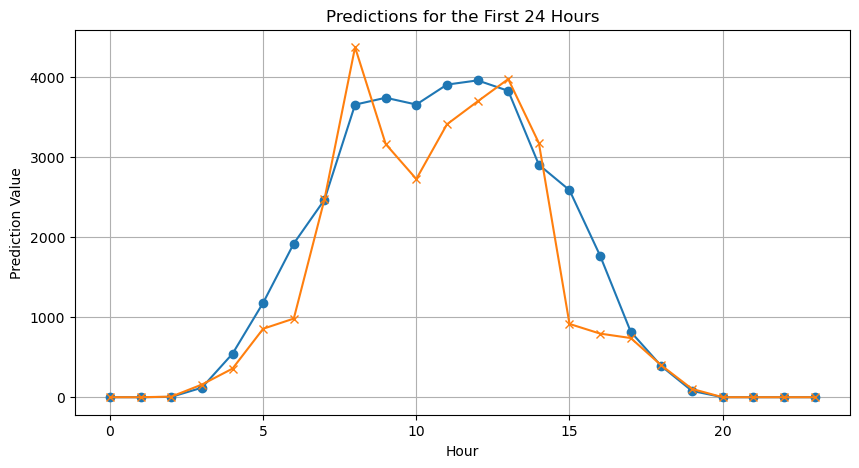

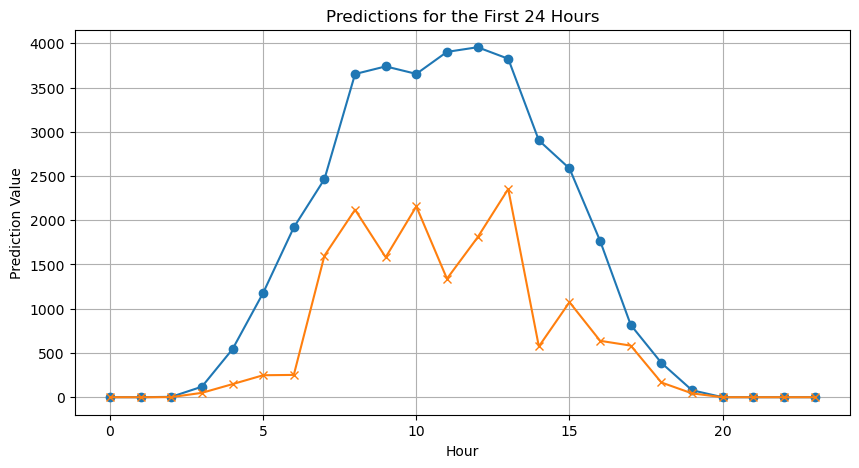

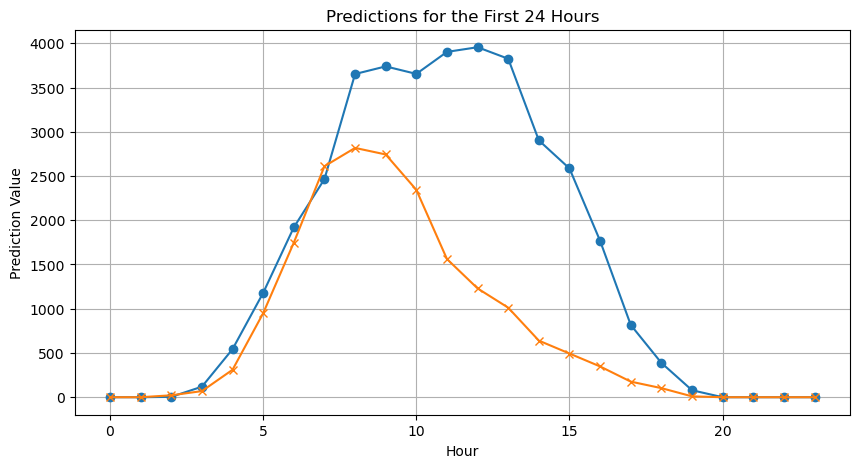

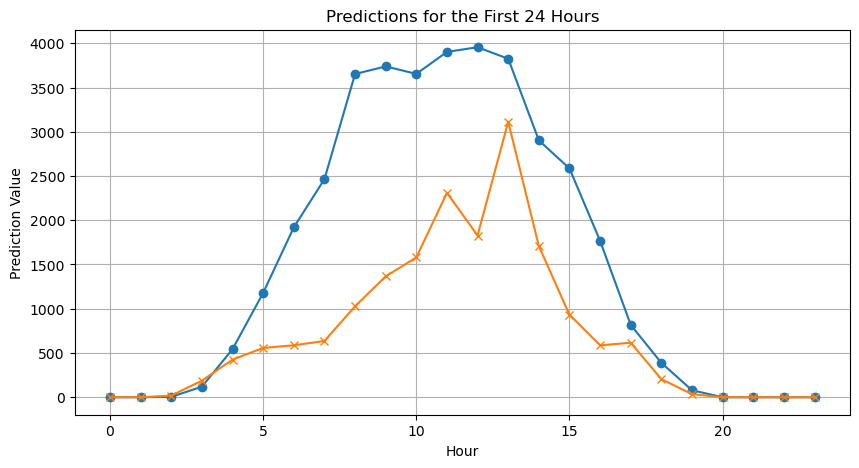

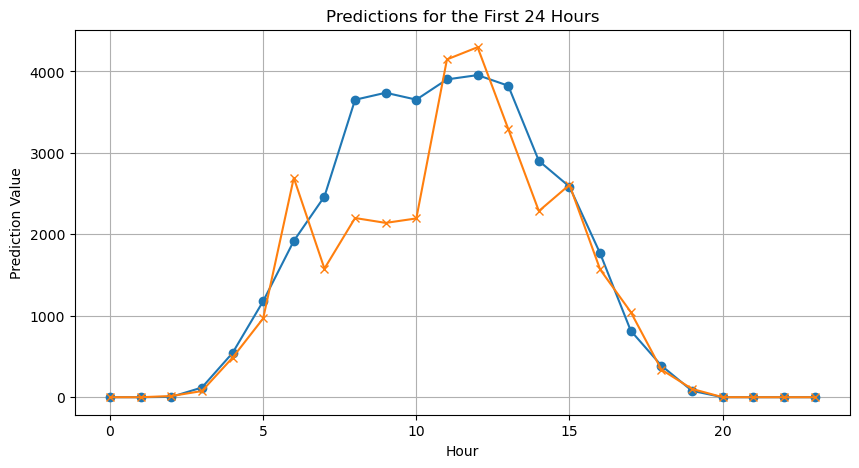

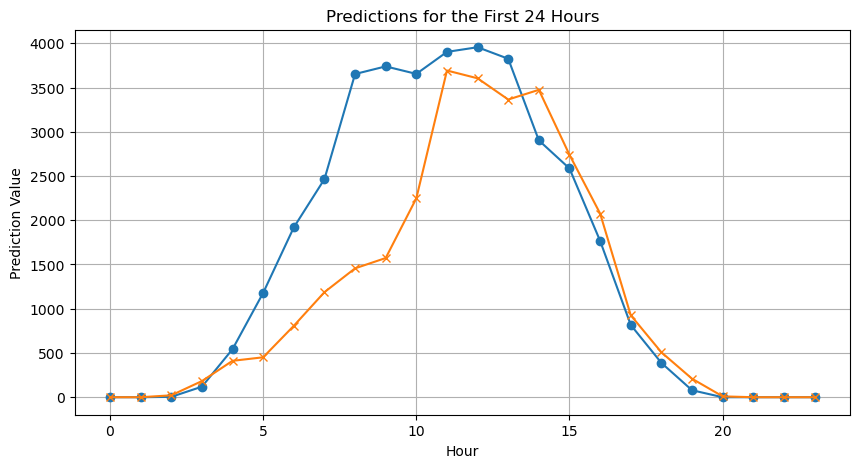

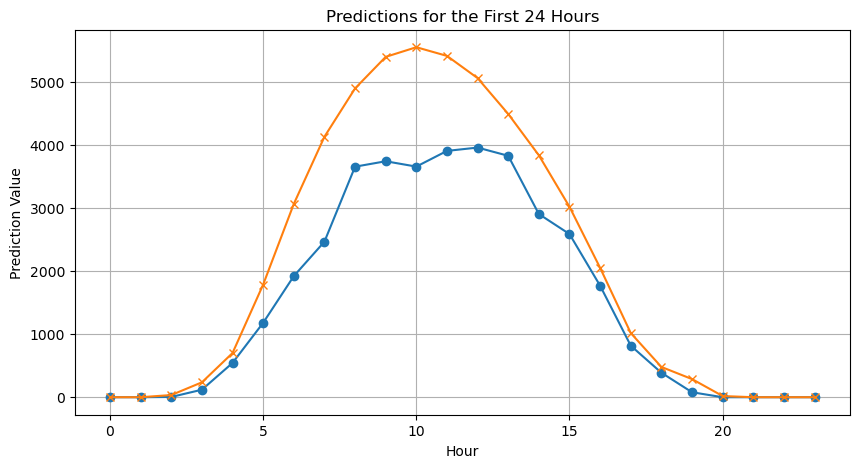

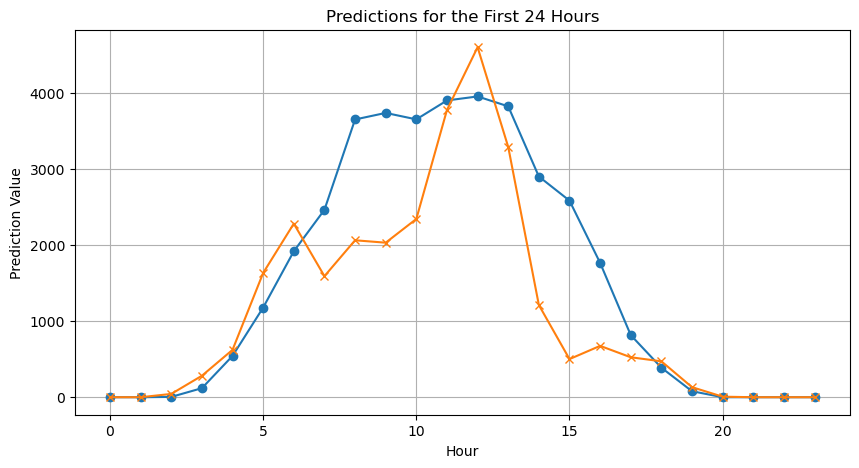

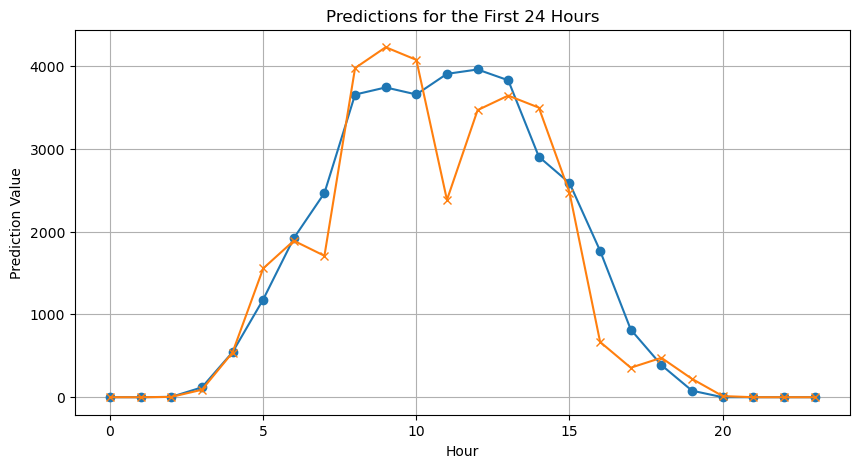

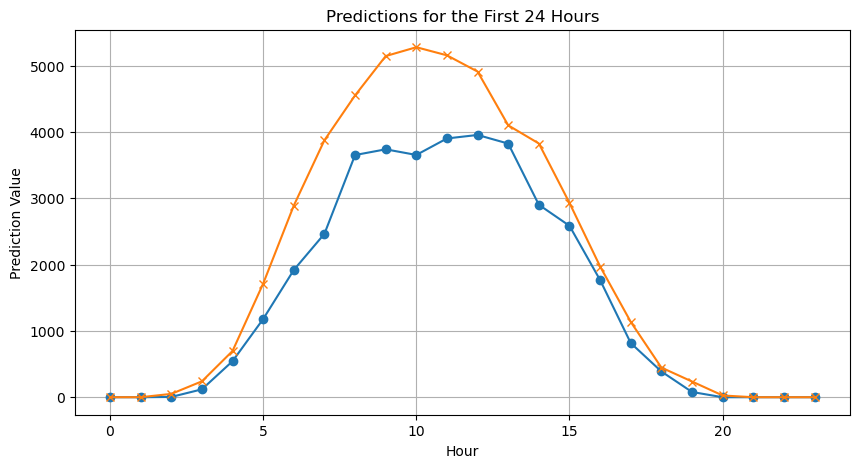

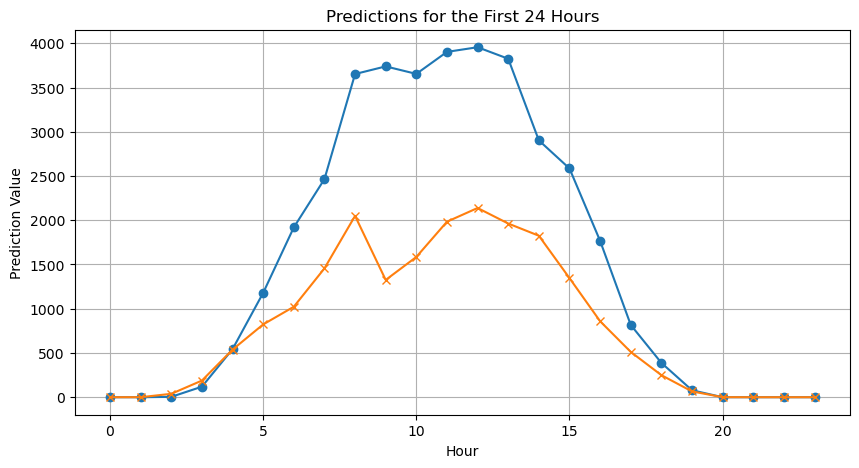

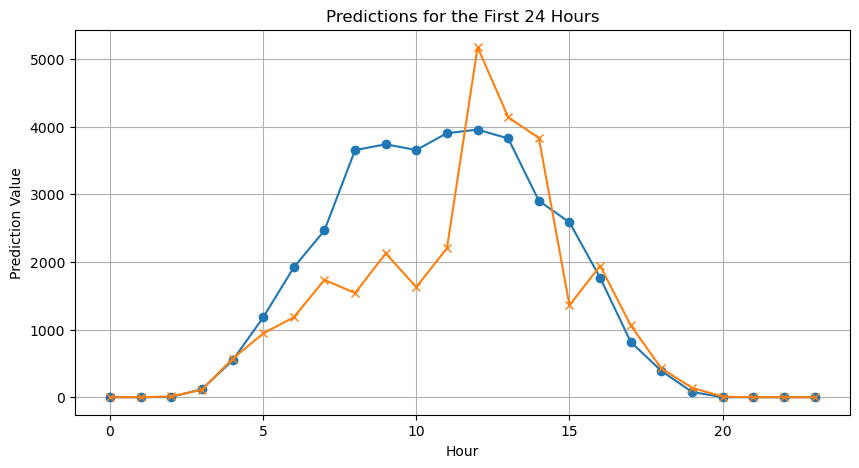

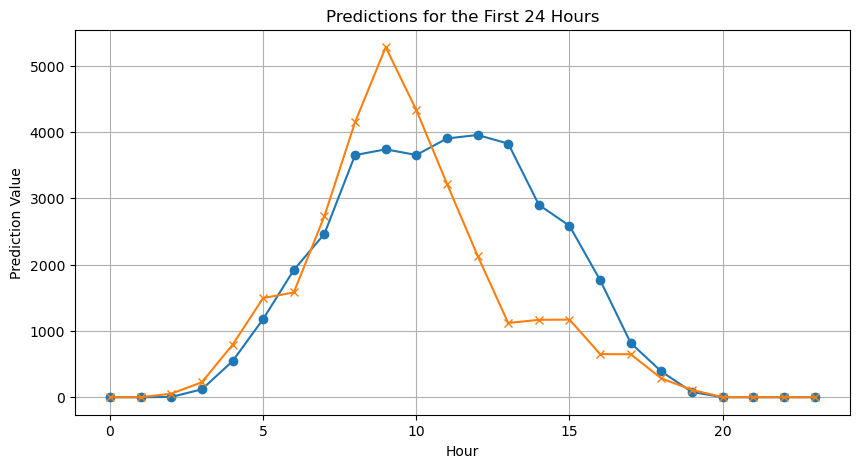

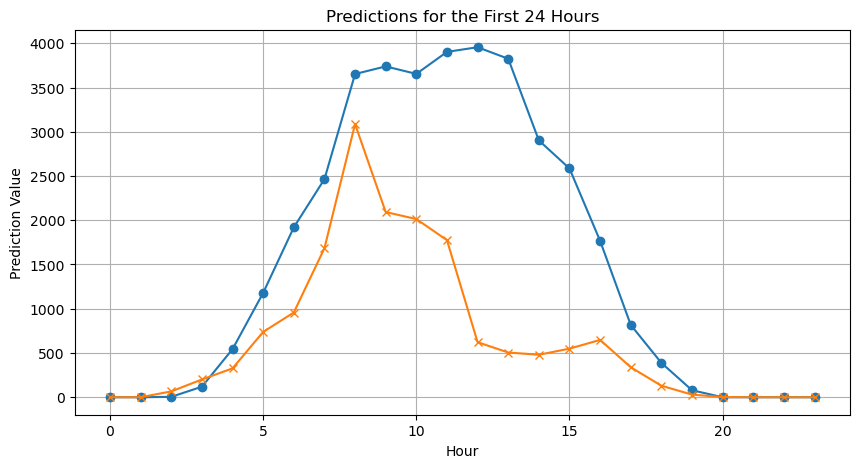

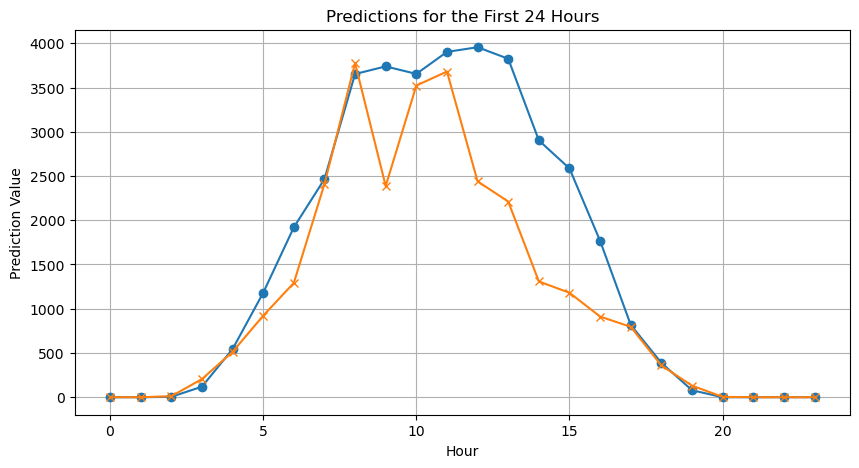

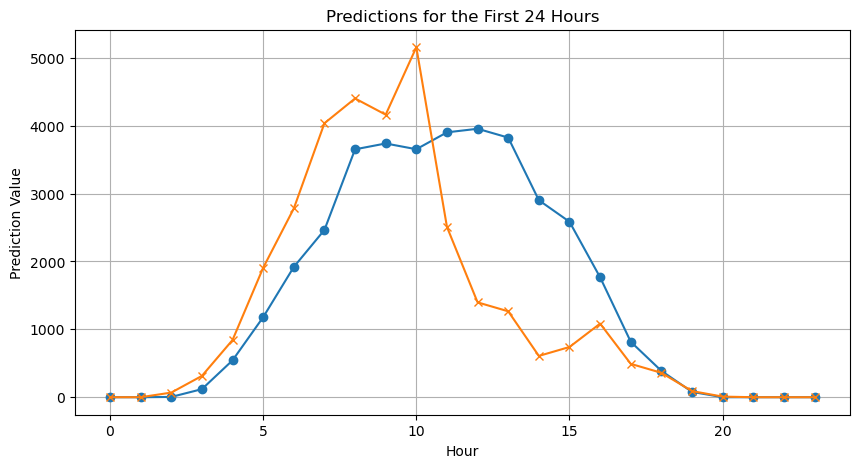

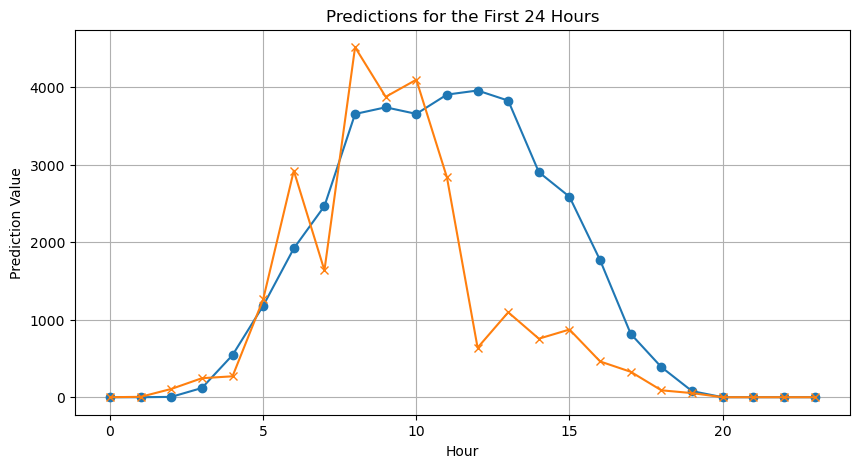

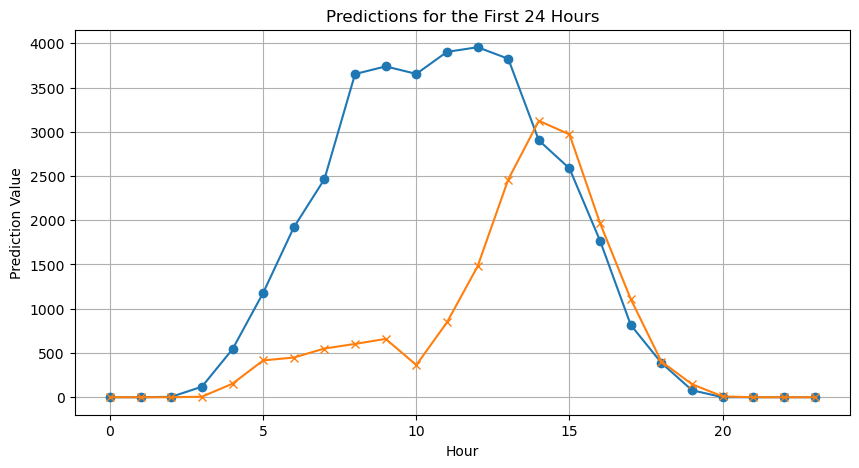

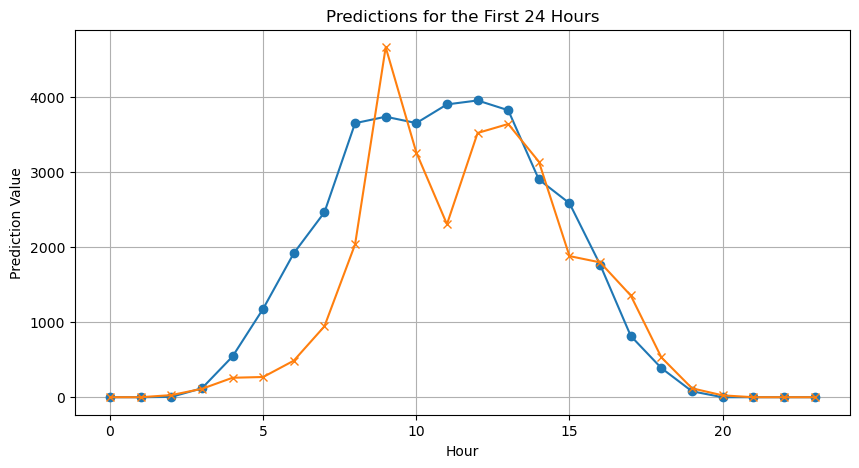

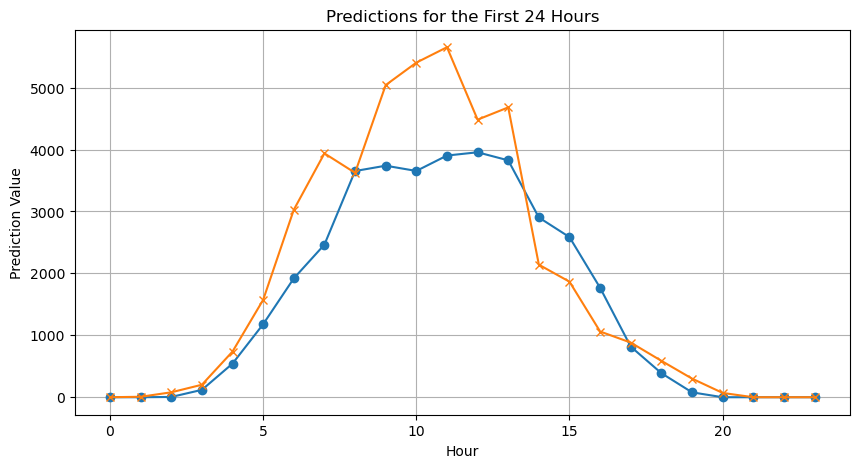

In [162]:
import matplotlib.pyplot as plt

def plot_submission(pred,date,month, year, date_2,y_observed):
    
    matching_index_pred = pred.index[pred['date_forecast'] == date].tolist()
    matching_index_y_observed = y_observed.index[y_observed['time'] == date_2].tolist()
    # Let's assume meta_model_a.prediction is your ndarray
    # Assuming the date is unique, take the first match
    start_index_pred = matching_index_pred[0]
    start_index_y_observed = matching_index_y_observed[0]
    # Get the next 24 values in 'pv_measurement' starting from the matching index
    predictions_pred = pred.loc[start_index_pred:start_index_pred + 23, 'pv_measurement'].reset_index(drop=True)
    predictions_y = y_observed.loc[start_index_y_observed:start_index_y_observed + 23, 'pv_measurement'].reset_index(drop=True)
    """
    day_mean = pd.DataFrame(columns=['pv_measurement'])
    
    for Hour in range (0, 25)
        filtered_df = df[(df['Year'] == year) & (df['Month'] == month) & (df['Hour'] == Hour)]
        # Calculate the average of the 'Value' column for the filtered rows
        average_value = filtered_df['pv_measurement'].mean()
    """ 
    # Creating a simple plot
    plt.figure(figsize=(10,5))  # Set the figure size as desired
    plt.plot(predictions_pred, marker='o', label = "predicted")  # Plot the predictions with circle markers
    
    plt.plot(predictions_y, marker='x', label='Observed')
    # Adding title and labels
    plt.title('Predictions for the First 24 Hours')
    plt.xlabel('Hour')
    plt.ylabel('Prediction Value')

    # Optional: Add gridlines to the plot
    plt.grid(True)

    # Show the plot
    plt.show()
for i in range (1,31):
    plot_submission(pred_a,"2023-05-06","5", "2022", f"2022-05-{i}",y_a )